In [1]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


C:\Users\reiha\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
!pip install librosa


In [3]:
dataset_path = r"C:\Users\reiha\Downloads\archive (13)"  # Update this with your actual path


In [4]:
# List all audio files in the dataset
audio_files = []
for root, _, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".wav"):  # Only select WAV files
            audio_files.append(os.path.join(root, file))

print(f"Total audio files found: {len(audio_files)}")


Total audio files found: 6508


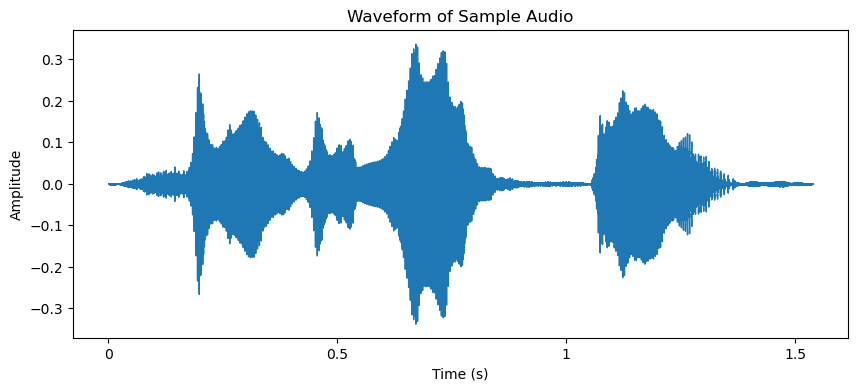

In [6]:
# Load an example audio file (first file in the list)
sample_file = audio_files[0]  # Pick the first audio file
y, sr = librosa.load(sample_file, sr=None)  # Load with original sampling rate

# Plot waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Sample Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [5]:
import pandas as pd 
import numpy as np 
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 
import librosa 
import librosa.display 
from IPython.display import Audio 
import warnings 
warnings.filterwarnings('ignore')

In [6]:
import os

# Define lists for storing paths and labels
paths = []
labels = []

# Loop through the files in the extracted dataset folder
for dirname, _, filenames in os.walk(r'C:\Users\reiha\Downloads\archive (13)'):  # Update with your actual folder path
    for filename in filenames:
        # Append the full path of each file
        paths.append(os.path.join(dirname, filename))
        
        # Extract the label from the filename (splitting by '_' and getting the last part before the extension)
        label = filename.split('_')[-1]  # Getting the last part of the filename after splitting by '_'
        label = label.split('.')[0]  # Removing the file extension (like .wav, .mp3, etc.)
        
        # Append the label to the labels list in lowercase
        labels.append(label.lower())

# Print the status and check the collected data
print('Dataset is Loaded')
print(f"Paths: {paths[:5]}")  # Print first 5 paths for preview
print(f"Labels: {labels[:5]}")  # Print first 5 labels for preview


Dataset is Loaded
Paths: ['C:\\Users\\reiha\\Downloads\\archive (13)\\OAF_angry\\OAF_back_angry.wav', 'C:\\Users\\reiha\\Downloads\\archive (13)\\OAF_angry\\OAF_bar_angry.wav', 'C:\\Users\\reiha\\Downloads\\archive (13)\\OAF_angry\\OAF_base_angry.wav', 'C:\\Users\\reiha\\Downloads\\archive (13)\\OAF_angry\\OAF_bath_angry.wav', 'C:\\Users\\reiha\\Downloads\\archive (13)\\OAF_angry\\OAF_bean_angry.wav']
Labels: ['angry', 'angry', 'angry', 'angry', 'angry']


In [7]:
paths[:5]

['C:\\Users\\reiha\\Downloads\\archive (13)\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\reiha\\Downloads\\archive (13)\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\reiha\\Downloads\\archive (13)\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\reiha\\Downloads\\archive (13)\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\reiha\\Downloads\\archive (13)\\OAF_angry\\OAF_bean_angry.wav']

In [8]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [9]:
#create dataframe
df=pd.DataFrame()
df["speech"]=paths
df["label"]=labels
df.head()

,speech,label
0,C:\Users\reiha\Downloads\archive (13)\OAF_angr...,angry
1,C:\Users\reiha\Downloads\archive (13)\OAF_angr...,angry
2,C:\Users\reiha\Downloads\archive (13)\OAF_angr...,angry
3,C:\Users\reiha\Downloads\archive (13)\OAF_angr...,angry
4,C:\Users\reiha\Downloads\archive (13)\OAF_angr...,angry


In [39]:
missing_values = df.isnull().sum()
print(missing_values)


speech    0
label     0
dtype: int64


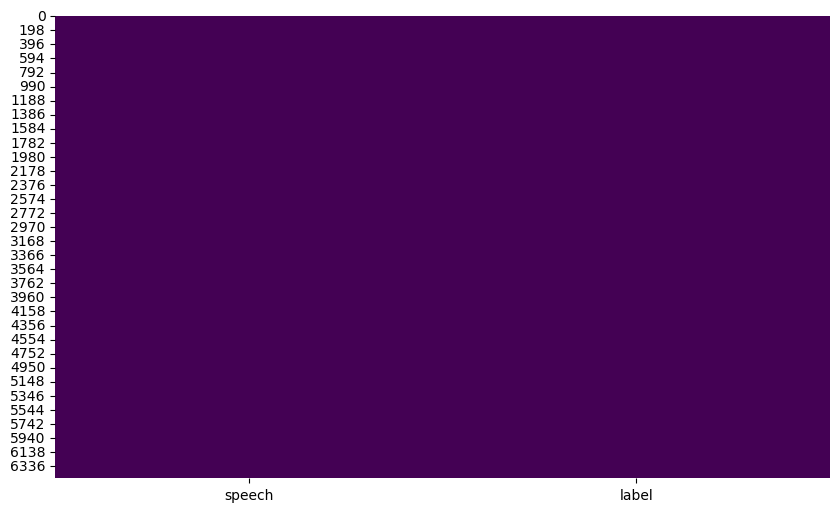

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()


In [10]:
df["label"].value_counts()

label
angry      1000
fear       1000
ps         1000
sad        1000
disgust     908
happy       800
neutral     800
Name: count, dtype: int64

In [11]:
import pandas as pd
from sklearn.utils import resample

# Assuming 'df' is already created as:
# df = pd.DataFrame({'speech': paths, 'label': labels})

# Check the class distribution
print("Original class distribution:")
print(df['label'].value_counts())

# Set the target number of samples per class (800 in this case)
target_count = 800

# Initialize an empty list to store downsampled data
downsampled_data = []

# Iterate over each unique class and perform downsampling
for label in df['label'].unique():
    # Filter the data by class
    class_data = df[df['label'] == label]
    
    # If the class has more samples than the target, downsample
    if len(class_data) > target_count:
        class_data_downsampled = resample(class_data, 
                                          n_samples=target_count, 
                                          random_state=42)
    else:
        # If the class has fewer samples than the target, leave it as is
        class_data_downsampled = class_data
    
    # Append the downsampled data to the list
    downsampled_data.append(class_data_downsampled)

# Combine the downsampled data into one DataFrame
balanced_df = pd.concat(downsampled_data, axis=0)

# Check the new class distribution
print("Balanced class distribution:")
print(balanced_df['label'].value_counts())

# Now the dataset is balanced with 800 samples per class


Original class distribution:
label
angry      1000
fear       1000
ps         1000
sad        1000
disgust     908
happy       800
neutral     800
Name: count, dtype: int64
Balanced class distribution:
label
angry      800
disgust    800
fear       800
ps         800
sad        800
happy      800
neutral    800
Name: count, dtype: int64


In [12]:
balanced_df["label"].value_counts()

label
angry      800
disgust    800
fear       800
ps         800
sad        800
happy      800
neutral    800
Name: count, dtype: int64

In [13]:
#exploratory data analysis

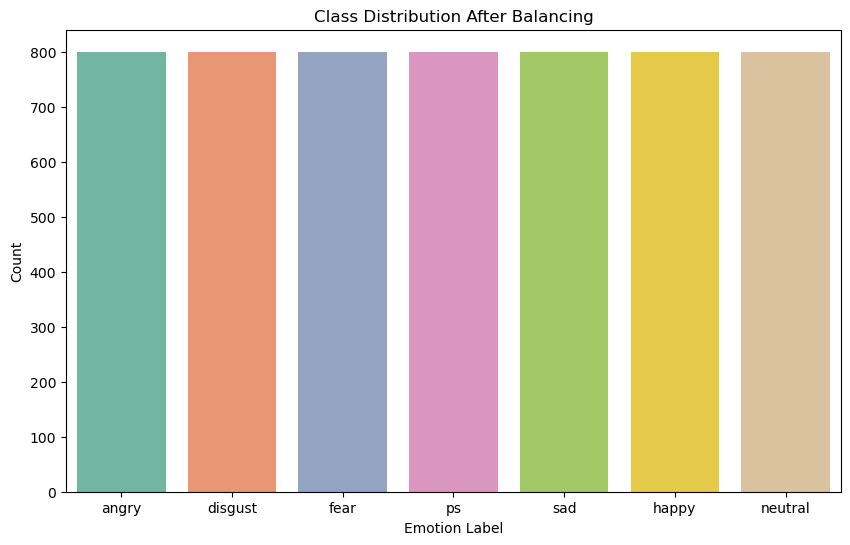

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the class distribution using seaborn's countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='label', palette='Set2')

# Set title and labels
plt.title('Class Distribution After Balancing')
plt.xlabel('Emotion Label')
plt.ylabel('Count')

# Show the plot
plt.show()


In [15]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Function to plot the waveform
def waveplot(balanced_df, sr, emotion):
    plt.figure(figsize=(10, 4))
    plt.title(f"Waveform of {emotion}", size=20)
    librosa.display.waveshow(balanced_df, sr=sr)  # Use 'waveshow' instead of 'waveplot' in librosa
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Function to plot the spectrogram
def spectrogram(balanced_df, sr, emotion):
    x = librosa.stft(balanced_df)  # Short-Time Fourier Transform
    xdb = librosa.amplitude_to_db(abs(x))  # Convert amplitude to decibels for visualization
    plt.figure(figsize=(10, 4))
    plt.title(f"Spectrogram of {emotion}", size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')  # Display spectrogram
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()


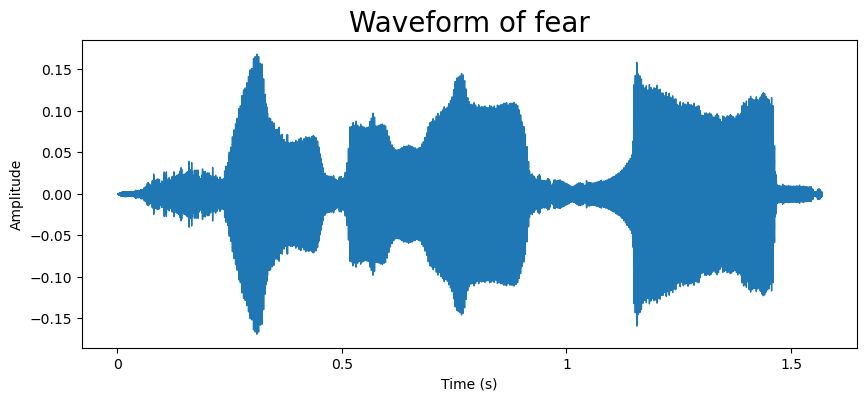

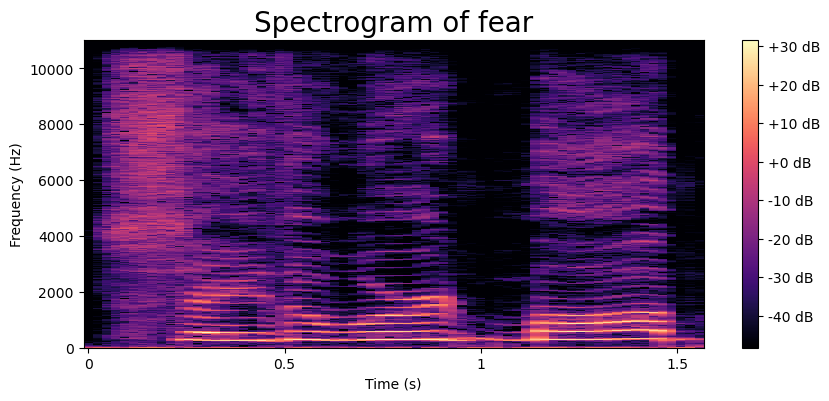

In [16]:
# Assuming 'df' contains the paths and labels (with columns 'speech' and 'label')

emotion = 'fear'  # Define the emotion you want to analyze
path = balanced_df['speech'][balanced_df['label'] == emotion].iloc[0]  # Get the path of the first file for that emotion

# Load the audio file
data, sampling_rate = librosa.load(path)

# Call waveplot and spectrogram functions
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)


In [17]:
Audio(path)

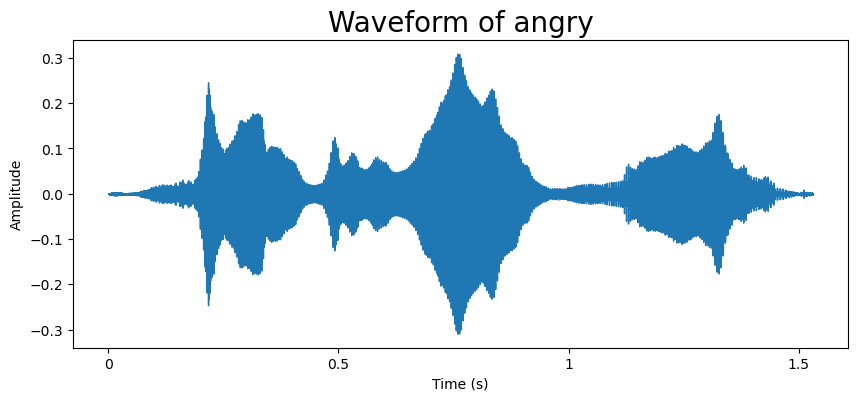

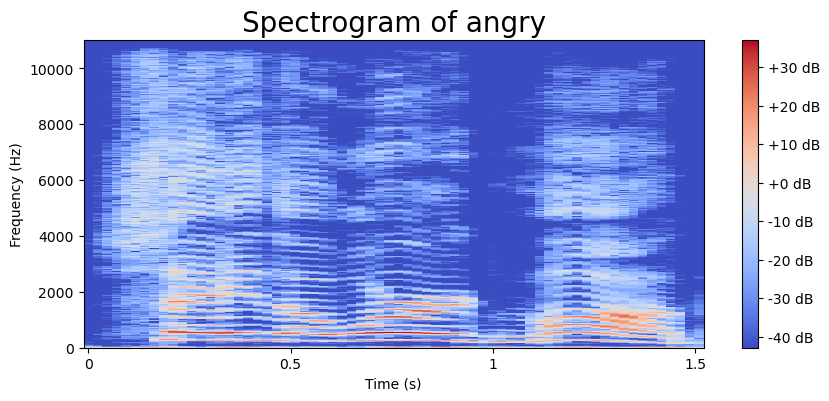

In [18]:
# Assuming 'df' contains the paths and labels (with columns 'speech' and 'label')

emotion = 'angry'  # Define the emotion you want to analyze
path = balanced_df['speech'][balanced_df['label'] == emotion].iloc[0]  # Get the path of the first file for that emotion

# Load the audio file
data, sampling_rate = librosa.load(path)

# Call waveplot and spectrogram functions
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)

In [19]:
Audio(path)

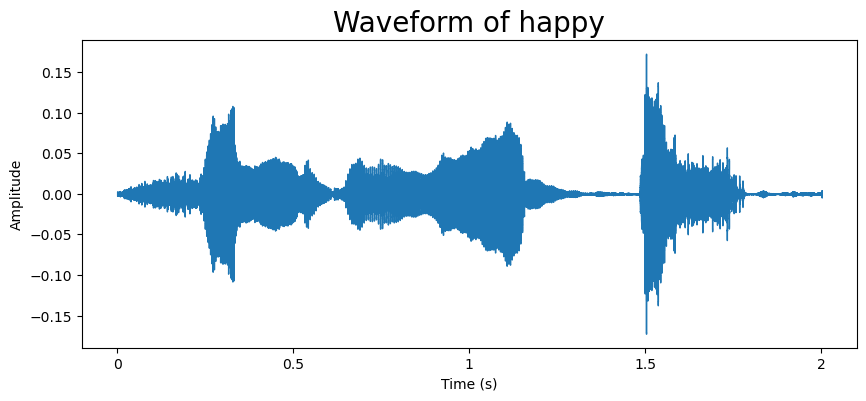

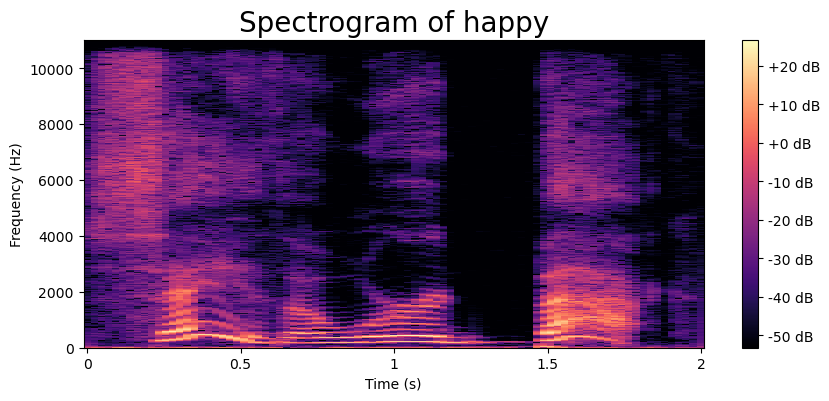

In [20]:
# Assuming 'df' contains the paths and labels (with columns 'speech' and 'label')

emotion = 'happy'  # Define the emotion you want to analyze
path = balanced_df['speech'][balanced_df['label'] == emotion].iloc[0]  # Get the path of the first file for that emotion

# Load the audio file
data, sampling_rate = librosa.load(path)

# Call waveplot and spectrogram functions
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)

In [21]:
Audio(path)

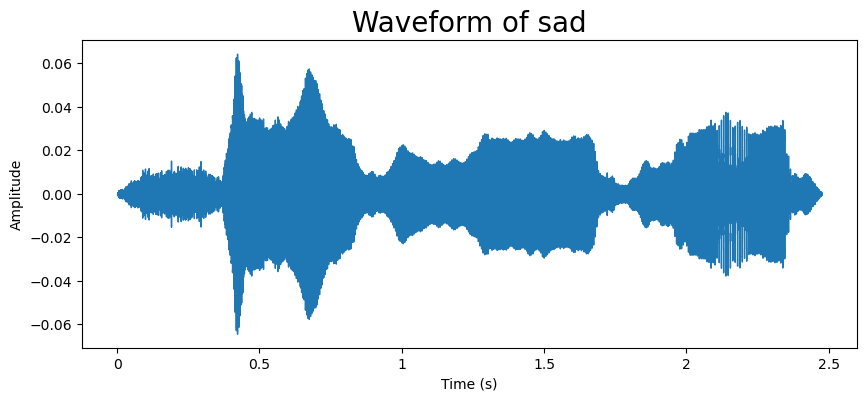

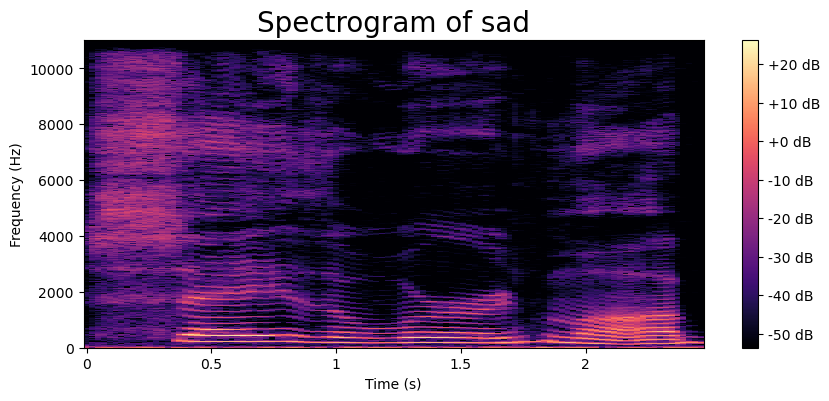

In [22]:
# Assuming 'df' contains the paths and labels (with columns 'speech' and 'label')

emotion = 'sad'  # Define the emotion you want to analyze
path = balanced_df['speech'][balanced_df['label'] == emotion].iloc[0]  # Get the path of the first file for that emotion

# Load the audio file
data, sampling_rate = librosa.load(path)

# Call waveplot and spectrogram functions
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)

In [23]:
Audio(path)

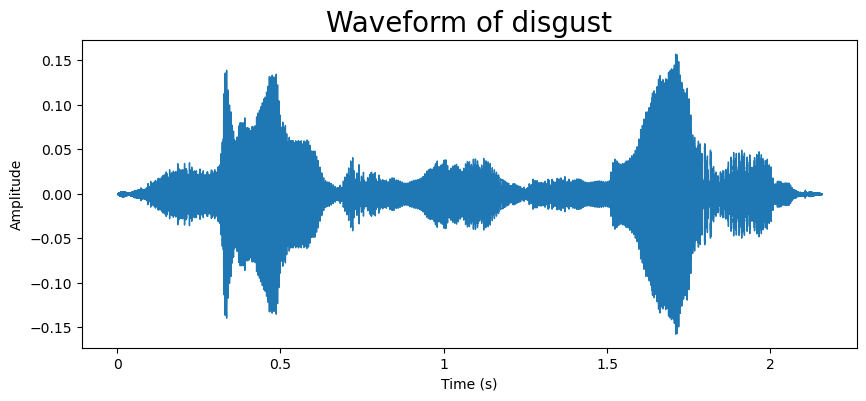

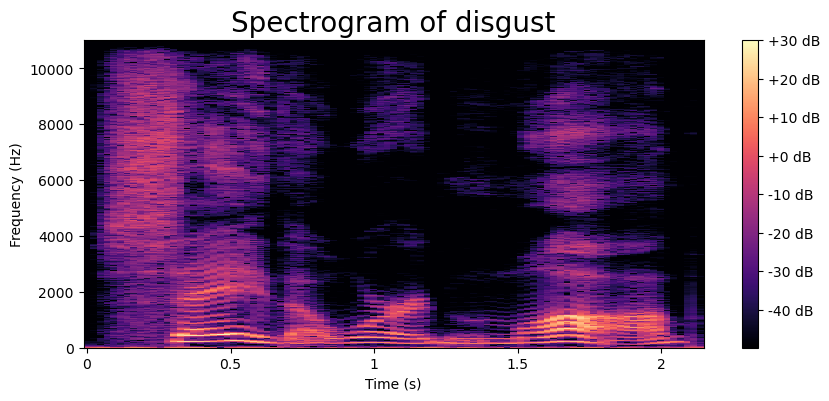

In [24]:
# Assuming 'df' contains the paths and labels (with columns 'speech' and 'label')

emotion = 'disgust'  # Define the emotion you want to analyze
path = balanced_df['speech'][balanced_df['label'] == emotion].iloc[0]  # Get the path of the first file for that emotion

# Load the audio file
data, sampling_rate = librosa.load(path)

# Call waveplot and spectrogram functions
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)

In [25]:
Audio(path)

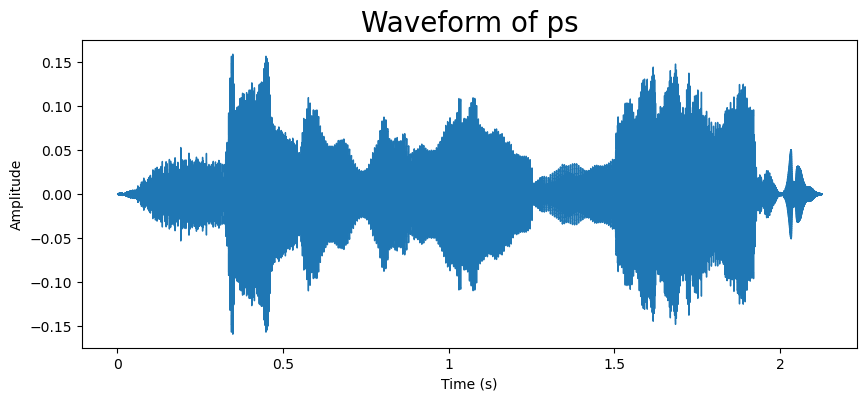

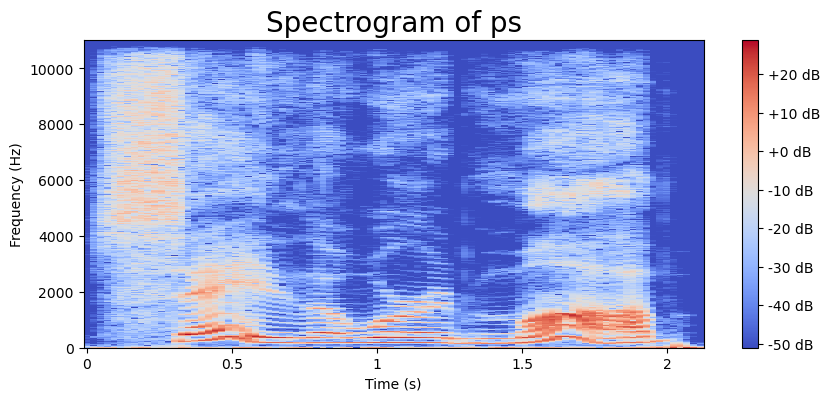

In [26]:
# Assuming 'df' contains the paths and labels (with columns 'speech' and 'label')

emotion = 'ps' #pleasant surprise # Define the emotion you want to analyze
path = balanced_df['speech'][balanced_df['label'] == emotion].iloc[0]  # Get the path of the first file for that emotion

# Load the audio file
data, sampling_rate = librosa.load(path)

# Call waveplot and spectrogram functions
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)

In [27]:
Audio(path)

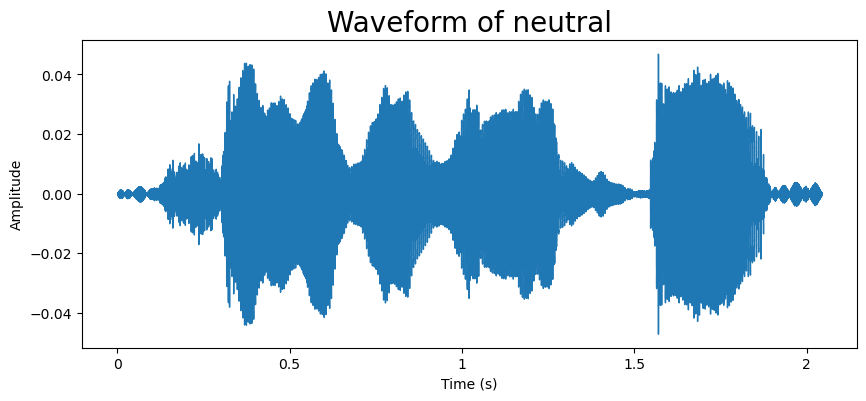

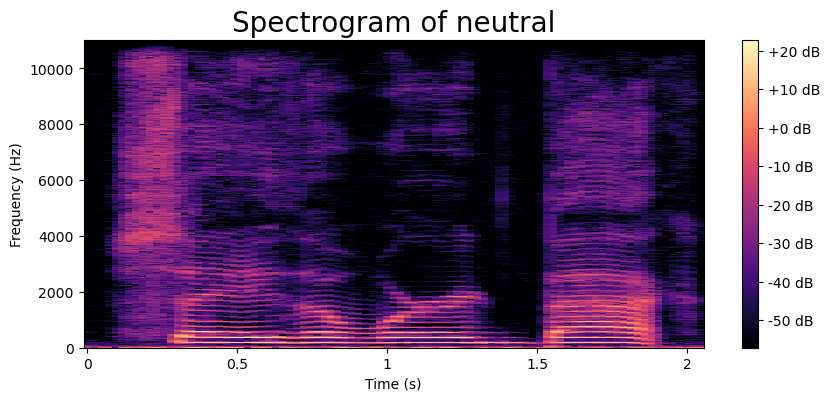

In [28]:
# Assuming 'df' contains the paths and labels (with columns 'speech' and 'label')

emotion = 'neutral'  # Define the emotion you want to analyze
path =balanced_df['speech'][balanced_df['label'] == emotion].iloc[0]  # Get the path of the first file for that emotion

# Load the audio file
data, sampling_rate = librosa.load(path)

# Call waveplot and spectrogram functions
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)

In [29]:
Audio(path)

In [30]:
#feature extraction

In [31]:
def extract_mfcc(filename):
    
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [38]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27550924e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126286e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722492e-01,  5.11131430e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996351e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

In [33]:
X_mfcc =balanced_df['speech'].apply(lambda x: extract_mfcc(x))

In [36]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560087, -32.74544, -...
2       [-429.79196, 46.124, 1.5550478, -0.2170951, 2....
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.865499, 16.092943, 8....
                              ...                        
6503    [-406.48053, 80.379875, 32.462395, 46.579094, ...
6504    [-426.90918, 102.54757, 24.800041, 43.04809, 4...
6505    [-378.50494, 80.91062, 35.30053, 39.74792, -4....
6506    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
6507    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 6508, dtype: object

In [37]:
# input split
X = np.expand_dims(X_mfcc, -1)
X.shape

(6508, 1)

In [38]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(6508, 40)

In [39]:
# input split
X = np.expand_dims(X, -1)
X.shape

(6508, 40, 1)

In [40]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [41]:
y=y.toarray()

In [42]:
y.shape

(6508, 7)

In [43]:
#create lstm model

In [44]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(128, return_sequences=False, input_shape=(40, 1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,127 (301.28 KB)

 Trainable params: 77,127 (301.28 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
#train the model

In [47]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=20, batch_size=512, shuffle=True)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.2216 - loss: 1.8996 - val_accuracy: 0.3103 - val_loss: 1.6943
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.4438 - loss: 1.5273 - val_accuracy: 0.6060 - val_loss: 1.3128
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.5813 - loss: 1.1222 - val_accuracy: 0.5230 - val_loss: 0.9848
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6805 - loss: 0.8645 - val_accuracy: 0.8264 - val_loss: 0.5730
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.7526 - loss: 0.6703 - val_accuracy: 0.8571 - val_loss: 0.4110
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8173 - loss: 0.5073 - val_accuracy: 0.9270 - val_loss: 0.2883
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8596 - loss: 0.3946 - val_accuracy: 0.9462 - val_loss: 0.1971
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9035 - loss: 0.2902 - val_accuracy: 0.9639 - v

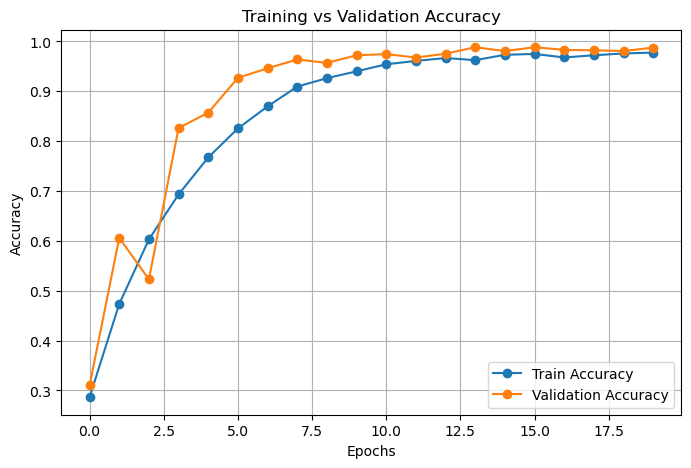

In [48]:
import matplotlib.pyplot as plt

# Extracting accuracy from history
epochs = range(len(history.history['accuracy']))  # Adjusting to actual training epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(epochs, acc, label='Train Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


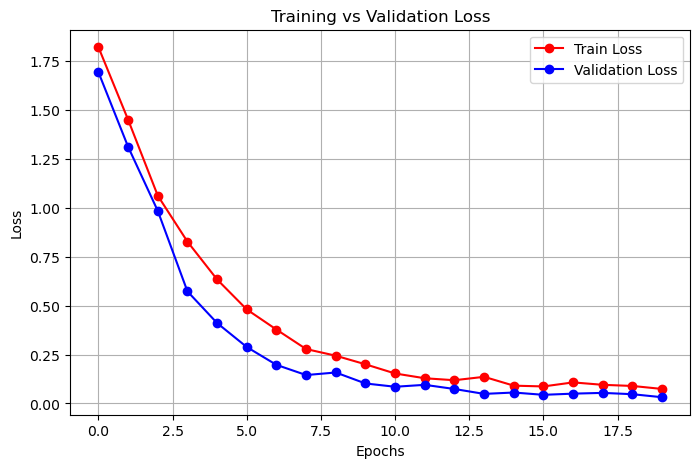

In [49]:
import matplotlib.pyplot as plt

# Extracting loss from history
epochs = range(len(history.history['loss']))  # Adjusting to actual training epochs
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, label='Train Loss', marker='o', color='red')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o', color='blue')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()


In [1]:
import importlib.metadata

required_packages = [
    "tensorflow",
    "numpy",
    "opencv-python",
    "scikit-learn",
    "matplotlib",
    "librosa",
    "pandas"
]

with open("requirements.txt", "w") as f:
    for package in required_packages:
        try:
            version = importlib.metadata.version(package)
            f.write(f"{package}=={version}\n")
        except importlib.metadata.PackageNotFoundError:
            print(f"Warning: {package} is not installed.")
            f.write(f"{package}\n")  # Write without version if not installed

print("requirements.txt file with exact versions has been created.")


requirements.txt file with exact versions has been created.
